# Regressão Linear como Previsor

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* 1. Introdução
  * 1.1. OLS como identificador de causalidade
  * 1.2. OLS como previsor
* 2. Regressão Linear Simples
  * 2.1. Estimando os Coeficientes
  * 2.2. Avaliando a Precisão das Estimativas dos Coeficientes
* 3. Regressão linear Múltipla
* 4. Outras Considerações no Modelo de Regressão

### Referências

* [Introduction to Statistical Learning](https://www.statlearning.com/) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani 
  * Esta aula segue o Capítulo 3 do livro "An Introduction to Statistical Learning" de James, Witten, Tibshirani e Friedman.
* [Avaliação Econômica de Projetos Sociais. Itaú Social, 2017](https://www.itausocial.org.br/wp-content/uploads/2018/05/avaliacao-economica-3a-ed_1513188151.pdf)
* Notas Próprias de aula	

### 1. Introdução

#### 1.1. OLS como identificador de causalidade

Vimos nas últimas aulas que podemos mapear a **relação causal através dos DAGs**, propostos por **Judea Pearl**. Além disso, vimos que para identificar a relação causal entre duas variáveis, precisamos controlar o caminho de porta dos fundos (**backdoor path**) entre as variáveis. Aprendemos sobre como controlar esses caminhos, utilizando **variáveis de controle (ou covariáveis)**, e como isso pode ser feito através de modelos de regressão.

Devido ao **problema fundamental da causalidade**, não conseguimos observar o que teria acontecido com o indivíduo tratado se ele não tivesse recebido o tratamento (***contrafactual***). Tampouco conseguimos observar o que teria acontecido com o indivíduo não tratado se ele tivesse recebido o tratamento (*contrafactual*). 

No entanto, conseguimos observar o valor médio do resultado do grupo de tratamento e do grupo controle (***uma medida de tendência central da amostra***). Assim, conseguimos recuperar o efeito médio do tratamento (ATE), por exemplo, através da diferença de médias entre os dois grupos. Cabe destacar que vimos, também, as definições de ITE, ATE, ATT, e ATNT.

Por fim, entendemos porque o **método experimental é o padrão ouro** para identificar efeitos causais. Ou seja, como ele elimina o viés de seleção, e o viés devido à heterogeneidade. Concluímos que a aplicação do estimador de mínimos quadrados (OLS) em um experimento randomizado é equivalente a calcular a diferença de médias entre os dois grupos (tratamento e controle), e identifica o efeito causal médio do tratamento.

#### 1.2. OLS como previsor

Veremos hoje que o OLS pode ser utilizado, também, como uma ferramenta para prever a variável de resultado ($Y$) a partir de variáveis preditoras ($X$).


### 2. Regressão Linear Simples

Primeiro, vamos carregar o conjunto de dados de Publicidade (Advertising.csv). Ele contém informações sobre as vendas de *displays* (em milhares de unidades) de um produto específico e uma lista de orçamentos de publicidade (em milhares de dólares) para TV, rádio e jornais.

Abrimos o conjunto de dados usando a biblioteca *pandas* para manipulação de conjuntos de dados e análise de dados em Python.


**Bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
import statsmodels.api as sm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

**Carregando dados**

In [2]:
advertising = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Advertising.csv', usecols=[1,2,3,4])

**Visualizando os dados**

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Vejamos as **Informações gerais** sobre o conjunto de dados

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Podemos ter mais informações sobre as variáveis ​​individuais usando a função `describe`.

In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Acessando colunas específicas**

Se você quiser apenas chamar uma variável em pandas, você tem 3 opções:

1. use colchetes como se a variável fosse um componente de um dicionário
2. use ou subscritos pontuais como se a variável fosse uma função dos dados
3. use a função `loc` 

In [6]:
advertising['TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [7]:
advertising.TV

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [8]:
advertising.loc[:, 'TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

Observe que a função `loc` é interessante e geralmente é usada para subconjuntos de linhas e colunas.

In [9]:
# Select multiple columns and subset of rows
advertising.loc[0:5,['Sales','TV']]

,Sales,TV
0,22.1,230.1
1,10.4,44.5
2,9.3,17.2
3,18.5,151.5
4,12.9,180.8
5,7.2,8.7


Suponha que estamos interessados ​​na relação (linear) entre vendas e propaganda na TV.

$$ \text{Sales} \approx \beta_0 + \beta_1 \times \text{TV} $$

OBS: O símbolo $\approx$ significa "aproximadamente igual a".

Como nosso foco está em ***PREVISÃO***, queremos saber: ***Como as duas variáveis ​​estão relacionadas?** 

Uma primeira possibilidade é a inspeção visual, através do ***gráfico de dispersão***.

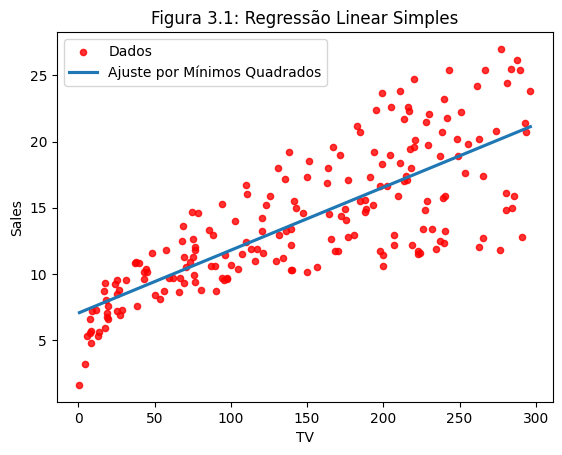

In [10]:
sns.regplot(x=advertising.TV, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':20})
plt.title('Figura 3.1: Regressão Linear Simples')
plt.legend(['Dados', 'Ajuste por Mínimos Quadrados'])
plt.show()

O gráfico de dispersão mostra que quanto maior o número de exibições na TV, maior o número de vendas. Isso sugere uma relação positiva entre as duas variáveis.

#### 2.1. Estimando os Coeficientes

Agora vamos focar no **ajuste** de $Y$ a partir de $X$ (ou seja, prever $Y$ a partir de $X$). 

* **Como estimamos a melhor linha de ajuste?**
  * ***Minimizar a Soma dos Quadrados dos Resíduos (SQR).***

Vajamos:

Primeiro, suponha que temos um conjunto de dados $D= [x_{i}, y_{i}]$, onde $x$ é a variável independente (*TV*) e $y$ é a variável dependente (*Sales*). O número de observações é $i=1, \ldots, N$.

Definimos a previsão de $y$ baseado em $X$ como:

$$ \hat{y}_i = \hat{\beta} X_i $$

Ou seja, o $\hat{y}_i$ é a previsão de $y_i$ baseado em $X_i$.

Os ***resíduos são os componentes não explicados do modelo***, ou seja, a diferença entre o valor observado e o valor previsto:

$$ e_i = y_i - \hat{y}_i $$

Nossa ***função objetivo*** (a ser minimizada) é a Soma dos Quadrados dos Resíduos (RSS):


$$ RSS := \sum_{i=1}^{N} e_i^2 $$

RSS: Resíduo Quadrático Total (Residual Sum of Squares), e ":=" é um símbolo de definição.

E o coeficiente MQO é definido como seu minimizador:

$$ \hat{\beta}_{OLS} = \arg\min_{\beta} \sum_{i=1}^{N} e_i^2  = \arg\min_{\beta} \sum_{i=1}^{N} (y_i - \beta X_i)^2 $$

Vamos usar a biblioteca  `sklearn` para ajustar um modelo de regressão linear de vendas (*Sales*) em propaganda de TV. (OBS: `scikit-learn` não existe o método *summary()*).

In [11]:
# Definir X e y
X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales.values
# rodar regressão linear
reg = LinearRegression().fit(X, y)

In [12]:
print(f"Intercepto: {reg.intercept_}")
print(f"Coeficiente: {reg.coef_[0]}")

Intercepto: 7.032593549127695
Coeficiente: 0.04753664043301975


OBS: `.values.reshape(-1,1)` transforma a variável para o formato que o scikit-learn exige: uma matriz 2D (n observações, 1 variável).

In [13]:
reg2 = LinearRegression().fit(advertising[['TV']], advertising[['Sales']])
print(f"Intercepto: {reg2.intercept_}")
print(f"Coeficiente: {reg2.coef_[0]}")

Intercepto: [7.03259355]
Coeficiente: [0.04753664]


**Visualizando os Resíduos**

Podemos visualizar os resíduos como as distâncias verticais entre os dados e a linha de previsão. A função objetivo RSS é a soma dos quadrados dos comprimentos das linhas verticais.

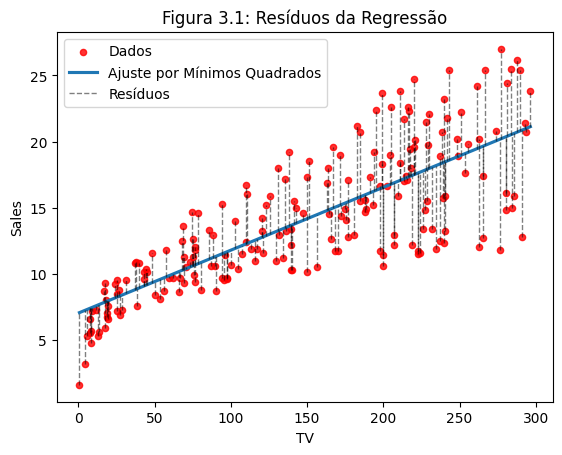

In [14]:
y_hat = reg.predict(X)

sns.regplot(x=advertising.TV, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':20})
plt.vlines(X, np.minimum(y, y_hat), np.maximum(y, y_hat), linestyle='--', color='k', alpha=0.5, linewidth=1)
plt.title('Figura 3.1: Resíduos da Regressão')
plt.legend(['Dados', 'Ajuste por Mínimos Quadrados', 'Resíduos'])
plt.show()

**Solução Analítica com Álgebra Linear**

A solução na forma de álgebra matricial é dada por:


$$\hat{\beta}_{OLS} = (X'X)^{-1}(X'y)$$

Python possui uma série de atalhos para tornar a sintaxe menos detalhada. No entanto, ainda precisamos importar a função `inv` do numpy. 


In [15]:
# coeficientes OLS com algebra matricial
beta = inv(X.T @ X) @ X.T @ y
print(beta)

[0.08324961]


Explicação:

* `X.T`: Transposta de X
* `X.T @ X`: Multiplicação de matrizes (X transposta vezes X)
* `inv(X.T @ X)`: Inversa da multiplicação
* `X.T @ y`: Multiplicação de matrizes (X transposta vezes y)
* `@` é o operador de multiplicação de matrizes em Python (numpy).

Por que o resultado é diferente?

***Falta um coeficiente: o intercepto.***

A nossa regressão agora se parece com isto:

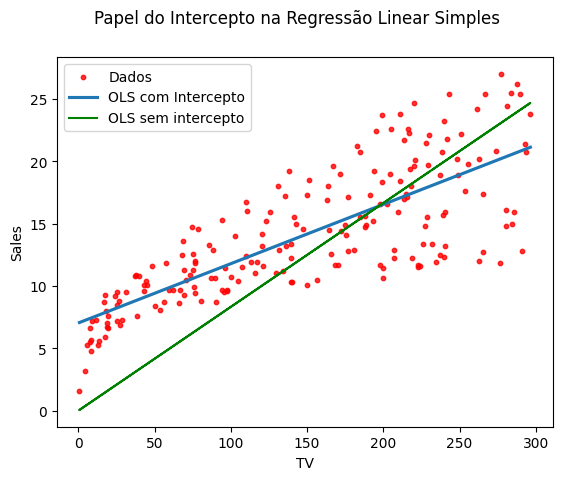

In [16]:
fig, ax = plt.subplots(1,1)
fig.suptitle('Papel do Intercepto na Regressão Linear Simples', fontsize=12)

# Add new line on the previous plot
sns.regplot(x=advertising.TV, y=advertising.Sales, ax=ax, order=1, ci=None, scatter_kws={'color':'r', 's':10})
ax.plot(X, beta*X, color='g')
ax.legend(['Dados', 'OLS com Intercepto', 'OLS sem intercepto'])

**Como inserimos um intercepto usando álgebra matricial?**

Basta adicionarmos uma coluna de uns.

$$ X_{1} = [1, X] = \begin{pmatrix} 1 & x_{1} \\ 1 & x_{2} \\ \vdots & \vdots \\ 1 & x_{N} \end{pmatrix} $$

In [17]:
# Adicionando o intercepto (columna de 1s)
one = np.ones(np.shape(X))
X1 = np.concatenate([one,X],axis=1)
print(np.shape(X1))

(200, 2)


Agora calculamos novamente os coeficientes como antes.

$$ \hat{\beta}_{OLS} = (X_{1}'X_{1})^{-1}(X_{1}'y) $$

In [18]:
# Computar beta OLS com intercepto
beta_OLS = inv(X1.T @ X1) @ X1.T @ y

print(beta_OLS)

[7.03259355 0.04753664]


Agora obtivemos de fato os mesmos coeficientes que obtivemos com o `scikit-learn`.

O que significa minimizar a Soma dos Quadrados dos Resíduos na prática? Como é a função objetivo?

In [19]:
from sklearn.preprocessing import scale

X_ = advertising.TV.values.reshape(-1,1)
y_ = advertising.Sales.values
regr = LinearRegression().fit(X_, y_)

# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_ + regr.coef_ * X_ - y_.reshape(-1,1))**2) / 1000
min_rss


2.1025305831313514

In [20]:
# Figure 3.2
def make_fig_3_2():
    fig = plt.figure(figsize=(15,6))
    fig.suptitle('RSS - Regression coefficients')

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
    ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
    ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
    ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
                alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
    ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
    ax2.set_zlabel('RSS')
    ax2.set_zlim(Z.min(),Z.max())
    ax2.set_ylim(0.02,0.07)

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$\beta_0$')
        ax.set_ylabel(r'$\beta_1$')
        ax.set_yticks([0.03,0.04,0.05,0.06])
        ax.legend()

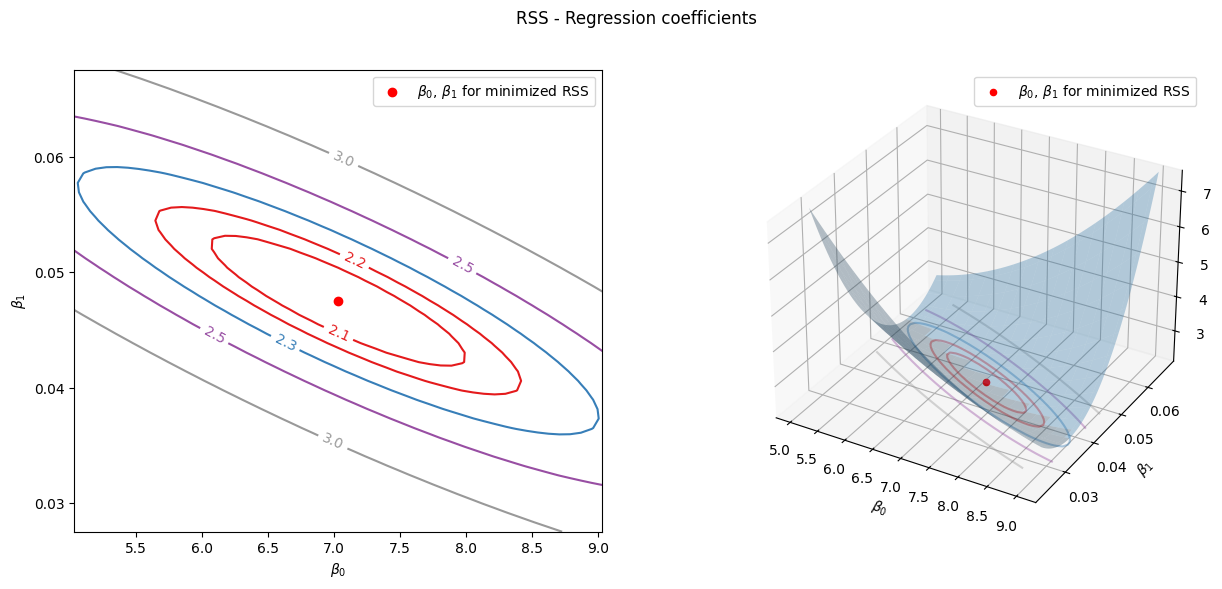

In [21]:
make_fig_3_2()

Essa é a visualização geométrica da função objetivo da regressão linear, que é minimizar a soma dos quadrados dos resíduos (RSS). A ideia é que o erro total (resíduos) é o menor possível segundo esse critério.

#### 2.2. Avaliando a Precisão das Estimativas dos Coeficientes

***Qual é a precisão do nosso ajuste de regressão?***

Suponha que estivéssemos extraindo amostras diferentes (pequenas) do mesmo processo de geração de dados, por exemplo:

$$ y_i = 2 + 3 x_i + \epsilon_i $$

onde:
* $x_i ~ \mathcal{N}(0, 1)$ e 
* $\epsilon_i \sim \mathcal{N}(0, 5)$. 

In [28]:
# Vamos simular um experimento
N = 30        # Tamanho da amostra em cada simulação
K = 100       # Número de simulações independentes
beta_hat = np.zeros((2,K))  # Matriz para armazenar os coeficientes estimados (intercepto e inclinação)
x = np.linspace(-4, 4, 100).reshape(-1, 1)  # Valores de x para o gráfico
np.random.seed(1)           # Seed que Garante reprodutibilidade

# Loop de K simulações
for i in range(K):
    # Gera N valores de x ~ N(0,1)
    x1 = np.random.normal(0,1,N).reshape([-1,1])  # vetor coluna de x
    
    # Matriz de regressores: coluna de 1s (intercepto) + x
    X = np.concatenate([np.ones(np.shape(x1)), x1], axis=1)

    # Gera erro aleatório: epsilon ~ N(0,5)
    epsilon = np.random.normal(0,5,N)

    # Coeficientes verdadeiros
    beta0 = [2,3]

    # Gera o y com base no modelo DGP
    y = X @ beta0 + epsilon

    # Estima os coeficientes OLS: (X'X)^(-1)X'y
    beta_hat[:,i] = inv(X.T @ X) @ X.T @ y


In [29]:
# Nova Figura 2
def make_new_fig_2():

    # Iniciar figura
    fig, ax = plt.subplots(1,1)
    
    for i in range(K):
        # Plotar linha
        ax.plot(x, beta_hat[0,i] + x*beta_hat[1,i], color='blue', alpha=0.2, linewidth=1)
        if i==K-1:
            ax.plot(x, beta_hat[0,i] + x*beta_hat[1,i], color='blue', alpha=0.2, linewidth=1, label='Estimated Lines')

    # Plotar linha verdadeira em vermelho
    ax.plot(x, 2 + 3*x, color='red', linewidth=3, label='True Line');
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.legend();
    ax.set_xlim(-4,4);

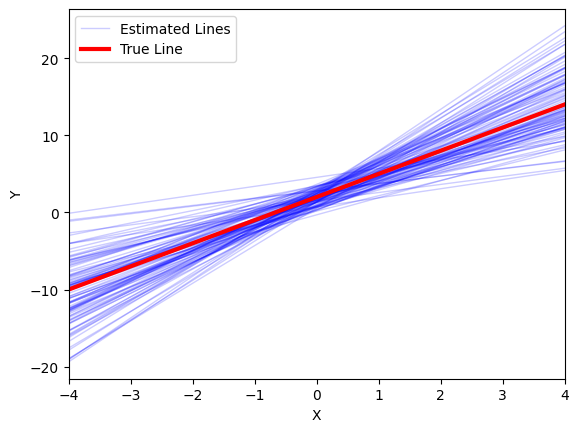

In [30]:
make_new_fig_2()

Cada linha azul que aparece no gráfico representa uma reta estimada de regressão obtida com uma amostra diferente. A reta vermelha é a reta verdadeira do Data Generating Process (DGP).

Relação com Intervalo de Confiança: O intervalo de confiança representa a variabilidade da estimativa de um parâmetro (como o coeficiente da regressão) em diferentes amostras aleatórias.

No gráfico: A dispersão das retas azuis em torno da reta vermelha mostra como as estimativas de $\hat{\beta}_{0}$ e $\hat{\beta}_{1}$ variam entre amostras. 

O gráfico mostra as 100 retas estimadas sobrepostas (em azul claro) e a reta verdadeira (em vermelho), ajudando a visualizar a variabilidade das estimativas.

O comando `regplot` nos permite desenhar intervalos de confiança automaticamente. Vamos desenhar o último conjunto de dados simulado com intervalos de confiança.

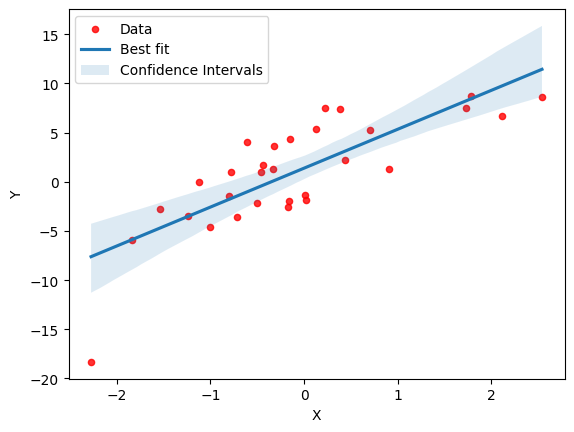

In [33]:
fig, ax = plt.subplots(1,1)

# Plotar última simulação scatterplot com IC
sns.regplot(x=x1, y=y, ax=ax, order=1, scatter_kws={'color':'r', 's':20});
ax.set_xlabel('X'); ax.set_ylabel('Y'); 
ax.legend(['Data', 'Best fit', 'Confidence Intervals']);

Como podemos ver, dependendo da amostra, obtemos uma estimativa diferente da relação linear entre $x$ e $y$. No entanto, essas estimativas estão, em média, corretas. De fato, podemos visualizar sua distribuição.

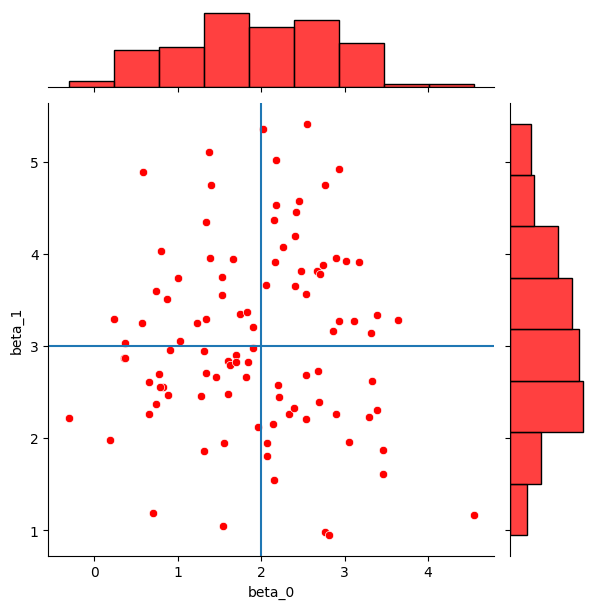

In [34]:
# Plotar distribuição dos coeficientes
plot = sns.jointplot(x=beta_hat[0,:], y=beta_hat[1,:], color='red', edgecolor="white");
plot.ax_joint.axvline(x=2);
plot.ax_joint.axhline(y=3);
plot.set_axis_labels('beta_0', 'beta_1');

***Como calculamos intervalos de confiança manualmente?***

$$Var(\hat{\beta}) = \sigma^2 (X'X)^{-1}$$

onde $\sigma^2 = var(\epsilon)$ é a variância do erro. Como **não sabemos $\sigma^2$**, estimamos considerando Var($\hat{\epsilon}$) ou $\hat{\sigma}^2$.

$$ \hat{Var}(\hat{\beta}) = \hat{\sigma}^2 (X'X)^{-1} $$

Se assumirmos que os erros padrão são distribuídos normalmente (aplicando o Teorema do Limite Central, assumindo $n \to \infty$), um intervalo de confiança de 95% para o coeficiente MQO assume a forma

$$ CI = \hat{\beta}_{OLS} -1.96 \times SE(\hat{\beta}_{OLS}) ; \hat{\beta}_{OLS} + 1.96 \times SE(\hat{\beta}_{OLS}) $$

onde $SE(\hat{\beta}_{OLS}) = \sqrt{Var(\hat{\beta})}$ é o erro padrão do coeficiente MQO.

In [44]:
# Importando X e y do exemplo anterior
X = advertising.TV.values.reshape(-1,1)
X1 = np.concatenate([np.ones(np.shape(X)), X], axis=1)
y = advertising.Sales.values

# Estimar os coeficientes OLS
beta_OLS = inv(X1.T @ X1) @ X1.T @ y

# Previsões e resíduos
y_hat = X1 @ beta_OLS
e = y - y_hat

# Cálculo dos graus de liberdade
n = len(y)
k = len(beta_OLS)
df = n - k

# Estimar a variância dos resíduos com ajuste de graus de liberdade
sigma_hat = np.sum(e**2) / df  # OU: np.var(e, ddof=k)

# Matriz de variância dos coeficientes
var_beta_OLS = sigma_hat * inv(X1.T @ X1)

# Erros padrão dos coeficientes (raiz da diagonal)
std_beta_OLS = np.sqrt(np.diag(var_beta_OLS))

print(std_beta_OLS)


[0.45784294 0.00269061]


In [45]:
std_beta_OLS = np.array(std_beta_OLS)
std_beta_OLS

array([0.45784294, 0.00269061])

In [46]:
# Computar beta OLS com intercepto
beta_OLS = inv(X1.T @ X1) @ X1.T @ y
beta_OLS

array([7.03259355, 0.04753664])

In [47]:
# calcular as estatísticas t
t_beta_OLS = beta_OLS / std_beta_OLS
print(t_beta_OLS)

[15.36027517 17.6676256 ]


In [48]:
# Calcular os p-valores
from scipy.stats import t

# p-valores bicaudais
p_values = 2 * (1 - t.cdf(np.abs(t_beta_OLS), df=df)) # t.cdf(...): é a função de distribuição acumulada da t de Student
print(p_values)


[0. 0.]


In [49]:
# Calcular os intervalos de confiança
alpha = 0.05
lower_bound = beta_OLS - t.ppf(1-alpha/2, df=df) * std_beta_OLS
upper_bound = beta_OLS + t.ppf(1-alpha/2, df=df) * std_beta_OLS
print(lower_bound, upper_bound)

[6.12971927 0.04223072] [7.93546783 0.05284256]


A biblioteca `statsmodels` nos permite produzir tabelas interessantes com estimativas de parâmetros e erros padrão.

In [50]:
# Table 3.1 & 3.2
est = sm.OLS.from_formula('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


**Avaliando a Precisão do Modelo**

* Que métricas podemos usar para avaliar se o modelo ajustado/estimado é um bom modelo, em termos de captura da relação entre as variáveis?

Primeiro, podemos calcular nossa função objetivo: a Soma dos Quadrados dos Resíduos (RSS). Valores mais baixos da nossa função objetivo indicam que obtivemos um ajuste melhor.

In [51]:
# RSS with regression coefficients
RSS = sum(e**2)
print(RSS)

2102.5305831313512


O problema com o **RSS** como métrica é que é difícil comparar diferentes regressões, pois sua escala depende da magnitude das variáveis.

Uma medida de ajuste que não depende da magnitude das variáveis ​​é $R^{2}$. 

O $R^{2}$ é a proporção da variação total na variável dependente que é explicada pelo modelo. Ou seja, o $R^{2}$ é a proporção da variação total em $y$ que é explicada pela variação em $x$.

$$ R^{2} = \frac{SSR}{TSS} = 1 - \frac{RSS}{TSS} $$

onde 

$$ TSS = \sum_{i=1}^{N} (y_i - \bar{y})^2 $$

$$ SSR = \sum_{i=1}^{N} (\hat{y}_i - \bar{y})^2 $$




* SSR: Soma dos quadrados explicados
* TSS = Soma total dos quadrados
* RSS = Soma dos quadrados dos resíduos

In [52]:
# TSS
TSS = sum( (y-np.mean(y))**2 )

# R2
R2 = 1 - RSS/TSS

print(R2)

0.6118750508500708


In [53]:
# SSR
SSR = sum((y_hat-np.mean(y))**2)

# R2 with SSR
R2_2 = SSR/TSS
print(R2_2)

0.6118750508500711


### 3. Regressão Linear Múltipla

E se tivermos mais de uma variável explicativa? Spoiler: já tínhamos, com uma constante...

Vamos dar uma olhada na regressão das despesas com anúncios em rádio e TV separadamente sobre as vendas (*Sales*).


***Regressão separada para Rádio e Jornal***

In [54]:
# Table 3.3 (1)
est = sm.OLS.from_formula('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [55]:
# Table 3.3 (2)
est = sm.OLS.from_formula('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


Parece que tanto o rádio quanto os jornais estão positivamente correlacionados com as vendas . Por que não estimamos uma regressão única com ambas as variáveis ​​dependentes?

**Regressão múltipla com todas as variáveis**

Suponhamos agora que enriquecemos nosso modelo anterior adicionando todas as diferentes formas de propaganda:

$$ \text{Sales} = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{Radio} + \beta_3 \text{Newspaper} + \varepsilon $$

Estimamos isso usando a biblioteca `statsmodels ols`.

In [116]:
# Table 3.4
est = sm.OLS.from_formula('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


**Explorando a Correlação**

Por que agora parece não haver relação entre Vendas e Jornal, enquanto a regressão univariada nos diz o oposto?

Vamos explorar a correlação entre essas variáveis.

In [117]:
# Table 3.5 - Correlation Matrix
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Vamos tentar inspecionar a relação visualmente.

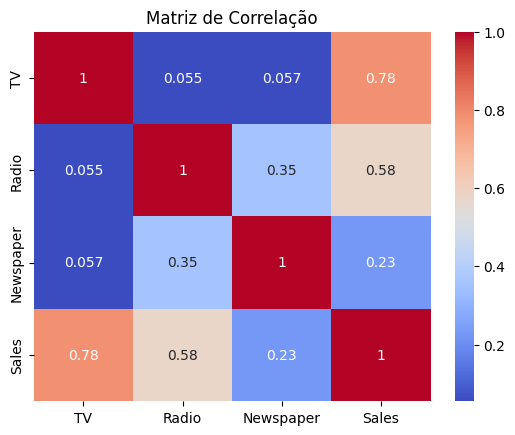

In [118]:
sns.heatmap(advertising.corr(), cmap="coolwarm", annot=True)
plt.title('Matriz de Correlação')
plt.show()

Vamos olhar de forma tridimensional. Para torná-lo visualmente acessível, consideramos apenas a duração dos anúncios de TV e rádio como variáveis ​​dependentes. O melhor ajuste será um plano em vez de uma linha.

In [56]:
# Fit regression
est = sm.OLS.from_formula('Sales ~ Radio + TV', advertising).fit()
print(est.params)

Intercept    2.921100
Radio        0.187994
TV           0.045755
dtype: float64


In [57]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)
B1, B2 = np.meshgrid(Radio, TV, indexing='xy')

# Compute predicted plane
Z = np.zeros((TV.size, Radio.size))
for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(est.params[0] + B1[i,j]*est.params[1] + B2[i,j]*est.params[2])
        
# Compute residuals
e = est.predict() - advertising.Sales

C:\Users\danie\AppData\Local\Temp\ipykernel_7700\2798086175.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Z[i,j] =(est.params[0] + B1[i,j]*est.params[1] + B2[i,j]*est.params[2])


In [58]:
# Figure 3.5 - Multiple Linear Regression
def make_fig_3_5():

    # Init figure
    fig = plt.figure()
    ax = axes3d.Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    fig.suptitle('Figure 3.5');


    # Plot best fit plane
    ax.plot_surface(B1, B2, Z, color='k', alpha=0.3)
    points = ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c=e, cmap="seismic", vmin=-5, vmax=5)
    plt.colorbar(points, cax=fig.add_axes([0.9, 0.1, 0.03, 0.8]))
    ax.set_xlabel('Radio'); ax.set_xlim(0,50)
    ax.set_ylabel('TV'); ax.set_ylim(bottom=0)
    ax.set_zlabel('Sales');
    ax.view_init(20, 20)

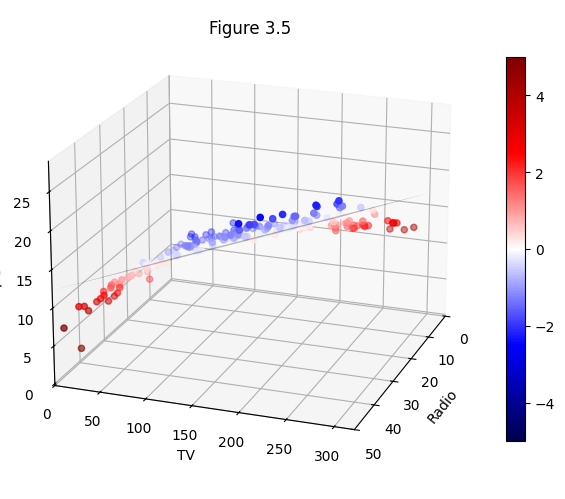

In [59]:
make_fig_3_5()

**Algumas perguntas importantes**

Como você verificaria se o modelo se ajusta bem aos dados com múltiplos regressores? 

A maioria dos pacotes de regressão (como o `statmodels`, por exemplo) geram automaticamente mais informações sobre o modelo de mínimos quadrados.

In [60]:
# Measires of fit
est.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,859.6
Date:,"ter, 29 abr 2025",Prob (F-statistic):,4.83e-98
Time:,11:18:11,Log-Likelihood:,-386.20
No. Observations:,200,AIC:,778.4
Df Residuals:,197,BIC:,788.3
Df Model:,2,,
Covariance Type:,nonrobust,,


Repare na primeira medida: o **teste F**. 

O teste F tenta responder à pergunta *“Existe uma relação entre a resposta e os preditores?”*

Em particular, testa a seguinte hipótese

$$ H_0: \beta_1 = \beta_2 = \beta_3 = 0 $$

$$ H_a: \text{pelo menos um } \beta_i \neq 0 $$

Este teste de hipótese é realizado através do cálculo da estatística F,

$$ F = \frac{(TSS - RSS)/k}{RSS/(n - k - 1)} $$

* $k$: número de variáveis preditoras (incluindo o intercepto)
* $n$: número de observações
* $TSS$: soma total dos quadrados
* $RSS$: soma dos quadrados dos resíduos

Manualmente:

In [61]:
X = advertising[['Radio', 'TV']]
y = advertising.Sales
e = y - est.predict(X)
RSS = np.sum(e**2)
TSS = np.sum((y - np.mean(y))**2)
(n,k) = np.shape(X)

# Computar F
F = ((TSS - RSS)/k) / (RSS/(n-k-1))
print('F = %.4f' % F)

F = 859.6177


Uma regra prática é rejeitar $H_0$ se $F > 10$. 

Também podemos testar se um subconjunto específico de coeficientes é igual a zero. Nesse caso, basta substituir a Soma dos Quadrados Totais (TSS) pela Soma dos Quadrados dos Resíduos sob o valor nulo (para o subconjunto).

### 4. Outras Considerações no Modelo de Regressão

**Preditores qualitativos**

E se algumas variáveis ​​forem qualitativas em vez de quantitativas? 


Vamos mudar o conjunto de dados para `credit` para ver esse ponto, depois voltamos para o `Advertising`.

In [62]:
credit = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Credit.csv', usecols=list(range(1,12)))

Este conjunto de dados contém informações sobre classificações de crédito, ou seja, cada pessoa recebe uma pontuação com base em suas próprias características individuais - *Rating*.

Vamos dar uma olhada nos tipos de dados.

In [63]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


Como podemos ver, algumas variáveis ​​como Gender, Student ou Married não são numéricas.

Podemos dar uma olhada mais de perto na aparência dessas variáveis.

In [64]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Vamos considerar a variável Student. Em uma inspeção rápida, parece ser uma variável binária Sim/Não . Vamos verificar listando todos os seus valores.

In [65]:
credit['Student'].unique()

array(['No', 'Yes'], dtype=object)

O que acontece se você passar uma variável binária para `statsmodel`? Ela gera automaticamente uma variável fictícia a partir dela.

In [66]:
# Table 3.7
est = sm.OLS.from_formula('Balance ~ Student', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,480.3694,23.434,20.499,0.000,434.300,526.439
Student[T.Yes],396.4556,74.104,5.350,0.000,250.771,542.140


Se uma variável assumir mais de um valor, `statsmodel` gera automaticamente um dummy exclusivo para cada nível.

In [67]:
# Table 3.8
est = sm.OLS.from_formula('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


**Relaxando a Suposição Aditiva**

Vimos que tanto a propaganda na TV quanto no rádio estão positivamente associadas às vendas. E se houver uma sinergia? Por exemplo, se alguém vê um anúncio na TV e no rádio, a probabilidade de comprar o produto é muito maior.

Considere o seguinte modelo

$$ Sales = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{Radio} + \beta_3 \text{TV} \times \text{Radio} + \varepsilon $$

que pode ser reescrito como

$$ Sales = \beta_0 + (\beta_1 + \beta_3 \text{Radio}) \text{TV} + \beta_2 \text{Radio} + \varepsilon $$

Vamos estimar o modelo de regressão linear, com o intercepto.



In [124]:
# Table 3.9 - Interaction Variables
est = sm.OLS.from_formula('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


Um termo de interação positivo e significativo indica uma sugestão de efeito de sinergia.

**Efeitos Heterogêneos**

Também podemos interagir com variáveis ​​qualitativas. Considere o conjunto de dados de classificação de crédito.

E se `Balance` depender de `Income` de forma diferente, dependendo se alguém é `Student` ou não?

Considere o seguinte modelo:

$$ Balance = \beta_0 + \beta_1 \text{Income} + \beta_2 \text{Student} + \beta_3 \text{Income} \times \text{Student} + \varepsilon $$

O último coeficiente ($\beta_3$) deve nos dizer quanto Balance aumenta em Income relação  e Students aos não estudantes.

De fato, podemos decompor a regressão da seguinte maneira equivalente:

$$ Balance = \beta_0 + \beta_1 \text{Income} + \varepsilon $$

que pode ser interpretada da seguinte maneira, pois Studenté uma variável binária.

1. Se a pessoa não for estudante:

$$ Balance = \beta_0 + \beta_1 \text{Income} + \varepsilon $$

2. Se a pessoa for estudante:

$$ Balance = (\beta_0 + \beta_2 ) + (\beta_1  + \beta_3) \text{Income} + \varepsilon $$

Estamos permitindo não apenas uma interceptação diferente para $\text{Student}$, $beta_0 + \beta_2$, mas também uma impacto diferente, $\beta_1 + \beta_3$ na renda.

Podemos inspecionar visualmente a distribuição Incomeentre os dois grupos.


In [132]:
# Divide data into students and non-students
x_student = credit.loc[credit.Student=='Yes','Income']
y_student = credit.loc[credit.Student=='Yes','Balance']
x_nonstudent = credit.loc[credit.Student=='No','Income']
y_nonstudent = credit.loc[credit.Student=='No','Balance']

In [133]:
# Make figure 3.8
def make_fig_3_8():
    
    # Init figure
    fig, ax = plt.subplots(1,1)
    fig.suptitle('Figure 3.8')

    # Relationship betweeen income and balance for students and non-students
    ax.scatter(x=x_nonstudent, y=y_nonstudent, facecolors='None', edgecolors='k', alpha=0.5);
    ax.scatter(x=x_student, y=y_student, facecolors='r', edgecolors='r', alpha=0.7);
    ax.legend(['non-student', 'student']);
    ax.set_xlabel('Income'); ax.set_ylabel('Balance');

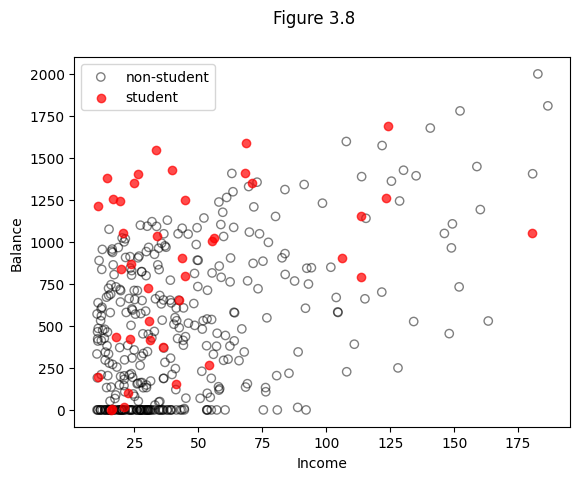

In [134]:
make_fig_3_8()

É difícil ver no gráfico de dispersão se há uma relação diferente entre renda e equilíbrio para estudantes e não estudantes.

Vamos ajustar duas regressões separadas.

In [135]:
# Interaction between qualitative and quantative variables
est1 = sm.OLS.from_formula('Balance ~ Income + Student', credit).fit()
reg1 = est1.params
est2 = sm.OLS.from_formula('Balance ~ Income + Student + Income*Student', credit).fit()
reg2 = est2.params

print('Regression 1 - without interaction term')
print(reg1)
print('\nRegression 2 - with interaction term')
print(reg2)

Regression 1 - without interaction term
Intercept         211.142964
Student[T.Yes]    382.670539
Income              5.984336
dtype: float64

Regression 2 - with interaction term
Intercept                200.623153
Student[T.Yes]           476.675843
Income                     6.218169
Income:Student[T.Yes]     -1.999151
dtype: float64


Sem o termo de interação, as duas retas têm níveis diferentes, mas a mesma inclinação. A introdução de um termo de interação permite que os dois grupos tenham respostas diferentes à Renda.

Podemos visualizar o relacionamento em um gráfico.

In [136]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(reg1['Intercept']+reg1['Student[T.Yes]'],
                       reg1['Intercept']+reg1['Student[T.Yes]']+150*reg1['Income'])
non_student1 =  np.linspace(reg1['Intercept'], reg1['Intercept']+150*reg1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(reg2['Intercept']+reg2['Student[T.Yes]'],
                       reg2['Intercept']+reg2['Student[T.Yes]']+
                       150*(reg2['Income']+reg2['Income:Student[T.Yes]']))
non_student2 =  np.linspace(reg2['Intercept'], reg2['Intercept']+150*reg2['Income'])

In [137]:
# Figure 3.7
def make_fig_3_7():
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
    fig.suptitle('Figure 3.7')

    # Plot best fit with and without interaction
    ax1.plot(income, student1, 'r', income, non_student1, 'k')
    ax2.plot(income, student2, 'r', income, non_student2, 'k')
    
    titles = ['Dummy', 'Dummy + Interaction']
    for ax, t in zip(fig.axes, titles):
        ax.legend(['student', 'non-student'], loc=2)
        ax.set_xlabel('Income')
        ax.set_ylabel('Balance')
        ax.set_ylim(ymax=1550)
        ax.set_title(t)

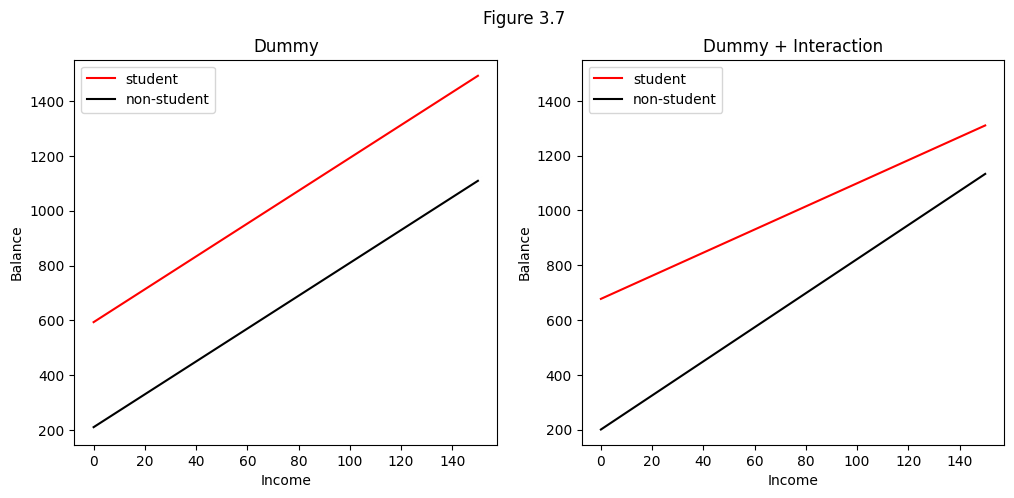

In [138]:
make_fig_3_7()

**Relações não lineares**

E se permitirmos mais não linearidades? Vamos alterar o conjunto de dados *car*.

In [139]:
auto = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Auto.csv', na_values='?').dropna()

Este conjunto de dados contém informações de uma grande variedade de modelos de carros.

In [140]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Suponha que quiséssemos entender quais características do carro estão correlacionadas com maior eficiência, ou seja mpg(milhas por galão).

Considere, em particular, a relação entre `mpg` e `horsepower`. Pode ser uma relação altamente não linear.

$$ mpg = \beta_0 + \beta_1 \text{horsepower} + \beta_2 \text{horsepower}^2 + ...$$

Quantos termos devemos incluir?

Vamos analisar os dados para entender se eles naturalmente sugerem não linearidades.



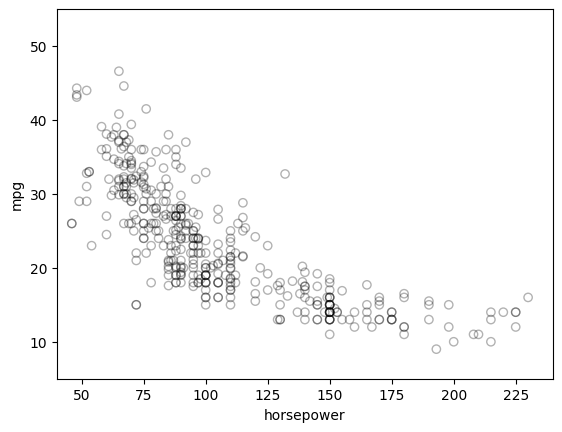

In [141]:
fig, ax = plt.subplots(1,1)

# Plot polinomials of different degree
plt.scatter(x=auto.horsepower, y=auto.mpg, facecolors='None', edgecolors='k', alpha=.3) 
plt.ylim(5,55); plt.xlim(40,240); 
plt.xlabel('horsepower'); plt.ylabel('mpg');

A relação parece não linear, mas de que maneira exatamente? Vamos tentar ajustar polinômios de diferentes graus.

In [142]:
def make_fig_38():
    
    # Figure 3.8 
    fig, ax = plt.subplots(1,1)
    ax.set_title('Figure 3.8')

    # Plot polinomials of different degree
    plt.scatter(x=auto.horsepower, y=auto.mpg, facecolors='None', edgecolors='k', alpha=.3) 
    sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
    sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
    sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
    plt.legend()
    plt.ylim(5,55)
    plt.xlim(40,240);

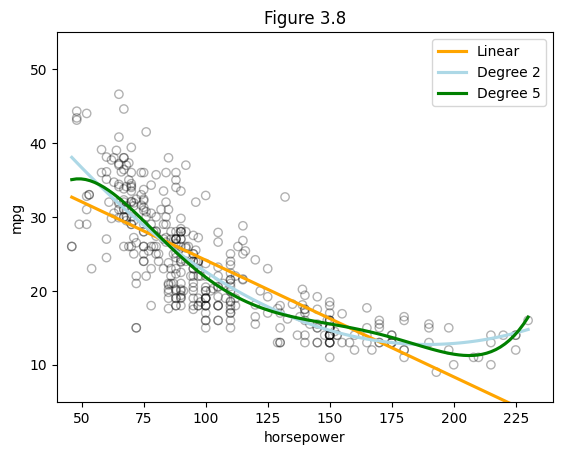

In [143]:
make_fig_38()

Como podemos ver, as caudas são altamente instáveis ​​dependendo da especificação.

Vamos adicionar um termo quadrático

In [172]:
# Table 3.10
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,pred1,resid1,pred2,resid2
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,16900,19.416046,-1.416046,17.091508,0.908492
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,27225,13.891480,1.108520,13.480156,1.519844
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,22500,16.259151,1.740849,14.658717,3.341283


Como a regressão muda?

In [145]:
est = sm.OLS.from_formula('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


**Não-linearidades**

Como podemos avaliar se existem não linearidades e de que tipo? Podemos observar os resíduos.

Se os resíduos apresentarem algum tipo de padrão, provavelmente poderíamos ter ajustado a reta melhor. Além disso, podemos usar o próprio padrão para entender como.

In [146]:
# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr = LinearRegression().fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']]
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

In [147]:
# Figure 3.9
def make_fig_39():
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
    fig.suptitle('Figure 3.9')

    # Left plot
    sns.regplot(x=auto.pred1, y=auto.resid1, lowess=True, 
                ax=ax1, line_kws={'color':'r', 'lw':1},
                scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
    ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
               xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
    ax1.set_title('Residual Plot for Linear Fit')

    # Right plot
    sns.regplot(x=auto.pred2, y=auto.resid2, lowess=True,
                line_kws={'color':'r', 'lw':1}, ax=ax2,
                scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
    ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
               xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
    ax2.set_title('Residual Plot for Quadratic Fit')

    for ax in fig.axes:
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')

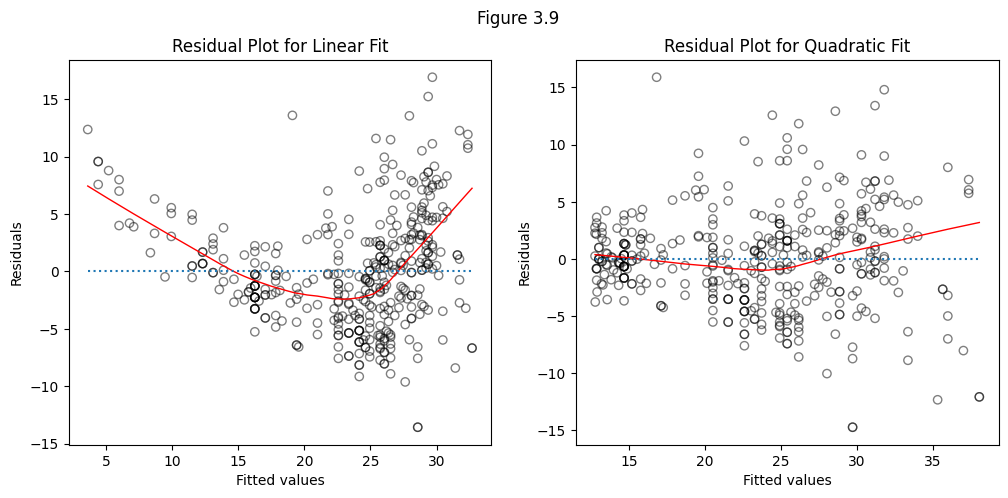

In [148]:
make_fig_39()

Parece que os resíduos do ajuste linear (à esquerda) exibem um padrão:

* valores positivos nas caudas
* valores negativos no centro
* Isso sugere um ajuste quadrático. De fato, os resíduos, quando incluídos $horsepower^2$ (à direita), parecem mais uniformemente centrados em torno de zero.

**Valores atípicos**

Observações com resíduos altos têm grande chance de serem altamente influentes. No entanto, não precisam ser.

Vamos usar o seguinte processo de geração de dados:

* $X~\mathcal{N}(0, 1)$
* $\epsilon~\mathcal{N}(0, 0.5)$
* $\beta_0 = 3$
* $y = \beta_0.X + \epsilon$

In [176]:
import numpy as np

np.random.seed(1)

# Generate random y
n = 50
X = np.random.normal(1,1,(n,1))
e = np.random.normal(0,0.5,(n,1))
b0 = 3
y = X*b0 + e

Agora vamos mudar a observação 20 para que ela se torne um outlier, ou seja, tenha um resíduo alto.

In [177]:
# Generate outlier
X[20] = 1
y[20] = 7

# Short regression without observation number 41
X_small = np.delete(X, 20)
y_small = np.delete(y, 20)

Vamos agora plotar os dados e os resíduos

In [178]:
# Figure 3.12
def make_fig_3_12():
    
    # Init figure
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 
    fig.suptitle('Figure 3.12')

    # Plot 1
    ax1.scatter(x=X, y=y, facecolors='None', edgecolors='k', alpha=.5) 
    sns.regplot(x=X, y=y, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'r', 'lw':1})
    sns.regplot(x=X_small, y=y_small, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'b', 'lw':1})
    ax1.set_xlabel('X'); ax1.set_ylabel('Y'); 
    ax1.legend(['With obs. 20', 'Without obs. 20'], fontsize=12);

    # Hihglight outliers
    ax1.scatter(x=X[20], y=y[20], facecolors='None', edgecolors='r', alpha=1) 
    ax1.annotate("20", (1.1, 7), color='r')

    # Compute fitted values and residuals
    r = regr.fit(X, y)
    y_hat = r.predict(X)
    e = np.abs(y - y_hat)

    # Plot 2
    ax2.scatter(x=y_hat, y=e, facecolors='None', edgecolors='k', alpha=.5)
    ax2.set_xlabel('Fitted Values'); ax2.set_ylabel('Residuals');
    ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
               xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted',color='k')

    # Highlight outlier
    ax2.scatter(x=y_hat[20], y=e[20], facecolors='None', edgecolors='r', alpha=1) 
    ax2.annotate("20", (2.2, 3.6), color='r');

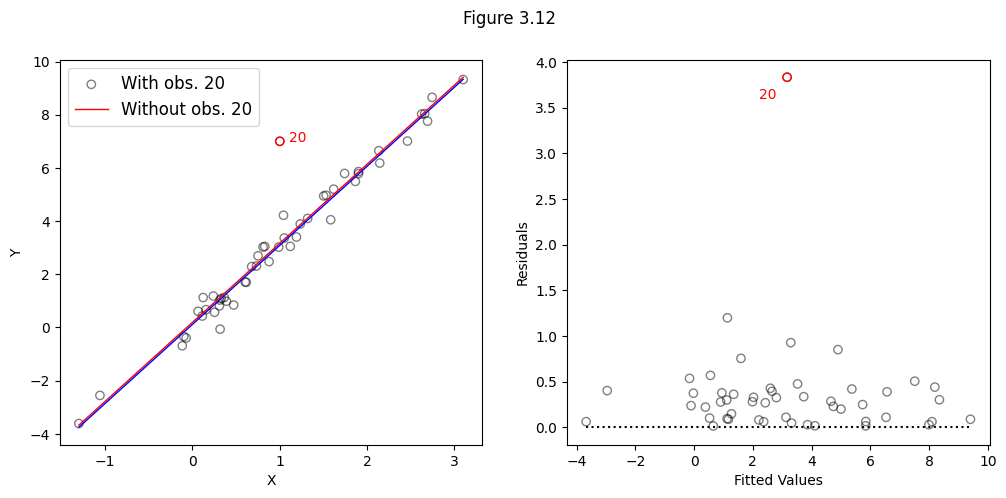

In [179]:
make_fig_3_12()

**Pontos de alta alavancagem**

Um conceito melhor de “observação influente” é a ***Alavancagem*** (Leverage), que representa o quanto uma observação está distante das outras em termos de observáveis.

A fórmula de alavancagem da observação *i* é:

$$ h_{i} = x_{i}(X'X)^{-1}x_{i}' $$

No entanto, a alavancagem por si só não é necessariamente suficiente para que uma observação seja altamente influente.

Vamos modificar a observação 41 para que ela tenha uma alta alavancagem.

In [180]:
# Generate observation with high leverage
X[41] = 4
y[41] = 12

# Short regression without observation number 41
X_small = np.delete(X_small, 41)
y_small = np.delete(y_small, 41)

# Compute leverage
H = X @ inv(X.T @ X) @ X.T
h = np.diagonal(H)

# Compute fitted values and residuals
y_hat = X @ inv(X.T @ X) @ X.T @ y
e = np.abs(y - y_hat) 

O que acontece agora que adicionamos uma observação com alta alavancagem? Como fica a alavancagem?

In [181]:
# Figure 3.13
def make_fig_3_13():

    # Init figure
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 
    fig.suptitle('Figure 3.12')

    # Plot 1
    ax1.scatter(x=X, y=y, facecolors='None', edgecolors='k', alpha=.5) 
    ax1.scatter(x=X[[20,41]], y=y[[20,41]], facecolors='None', edgecolors='r', alpha=1) 
    sns.regplot(x=X, y=y, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'r', 'lw':1})
    sns.regplot(x=X_small, y=y_small, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'b', 'lw':1})
    ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.axis(xmax=4.5);
    ax1.legend(['With obs. 20,41', 'Without obs. 20,41']);

    # Highlight points
    ax1.annotate("20", (1.1, 7), color='r')
    ax1.annotate("41", (3.6, 12), color='r');



    # Plot 2
    ax2.scatter(x=h, y=e, facecolors='None', edgecolors='k', alpha=.5)
    ax2.set_xlabel('Leverage'); ax2.set_ylabel('Residuals'); 
    ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
               xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted',color='k')
    # Highlight outlier
    ax2.scatter(x=h[[20,41]], y=e[[20,41]], facecolors='None', edgecolors='r', alpha=1);

    # Highlight points
    ax2.annotate("20", (0, 3.7), color='r')
    ax2.annotate("41", (0.14, 0.4), color='r');

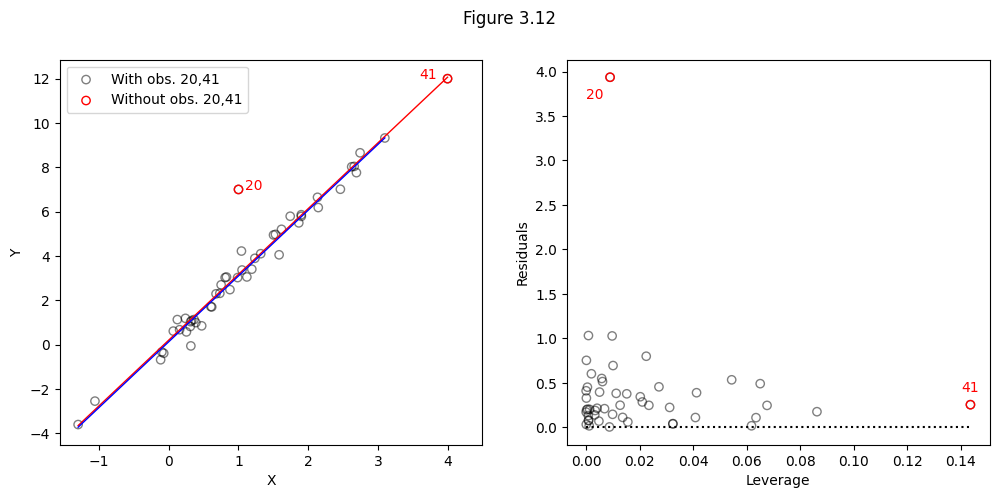

In [182]:
make_fig_3_13()

**Observações Influentes**

Como vimos, ser um outlier ou ter alta alavancagem por si só pode não ser suficiente para concluir que uma observação é influente.

O que realmente importa é uma combinação de ambos: observações com alta alavancagem e altos resíduos, ou seja, observações que não são apenas diferentes em termos de observáveis ​​(alta alavancagem), mas também são diferentes em termos de sua relação entre observáveis ​​e variável dependente (alto resíduo).

Vamos agora modificar a observação 7 para que ela seja um valor atípico e tenha alta alavancagem.

In [183]:
# Generate outlier with high leverage
X[7] = 4
y[7] = 7

In [184]:
# Short regression without observation number 41
X_small = np.delete(X, 7)
y_small = np.delete(y, 7)

# Compute leverage
H = X @ inv(X.T @ X) @ X.T
h = np.diagonal(H)

# Compute fitted values and residuals
r = regr.fit(X, y)
y_hat = r.predict(X)
e = np.abs(y - y_hat)

In [185]:
def make_fig_extra_3():

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 

    # Plot 1
    ax1.scatter(x=X, y=y, facecolors='None', edgecolors='k', alpha=.5) 
    ax1.scatter(x=X[[7,20,41]], y=y[[7,20,41]], facecolors='None', edgecolors='r', alpha=1) 
    sns.regplot(x=X, y=y, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'r', 'lw':1})
    sns.regplot(x=X_small, y=y_small, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'b', 'lw':1})
    ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.axis(xmax=4.5);
    ax1.legend(['With obs. 7,20,41', 'Without obs. 7,20,41']);

    # Highlight points
    ax1.annotate("7", (3.7, 7), color='r')
    ax1.annotate("20", (1.15, 7.05), color='r')
    ax1.annotate("41", (3.6, 12), color='r');



    # Plot 2
    ax2.scatter(x=h, y=e, facecolors='None', edgecolors='k', alpha=.5)
    ax2.set_xlabel('Leverage'); ax2.set_ylabel('Residuals'); 
    ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
               xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted',color='k')
    # Highlight outlier
    ax2.scatter(x=h[[7,20,41]], y=e[[7,20,41]], facecolors='None', edgecolors='r', alpha=1);

    # Highlight points
    ax2.annotate("7", (0.12, 4.0), color='r');
    ax2.annotate("20", (0, 3.8), color='r')
    ax2.annotate("41", (0.12, 0.9), color='r');

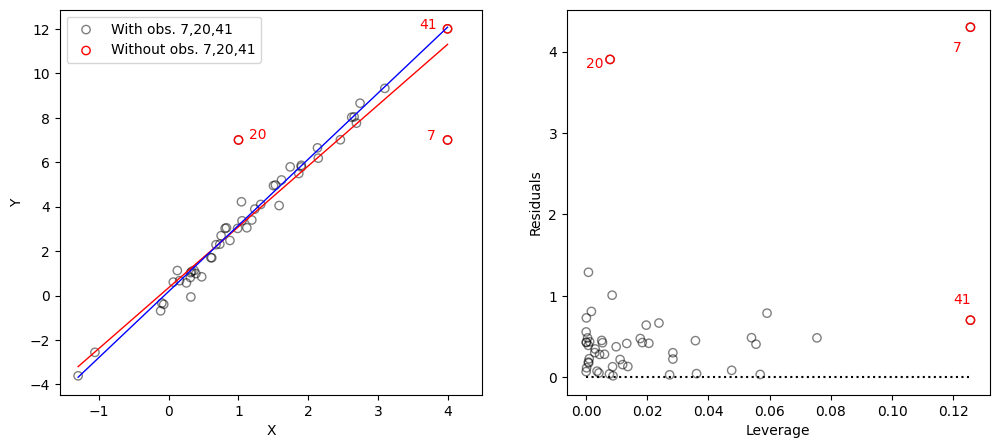

In [186]:
make_fig_extra_3()

**Colinearidade**

Colinearidade é a situação em que duas variáveis ​​dependentes são altamente correlacionadas entre si. Algebricamente, isso é um problema porque $X´X$ a matriz se torna quase não invertível.

Vamos dar uma olhada no `ratings` conjunto de dados.

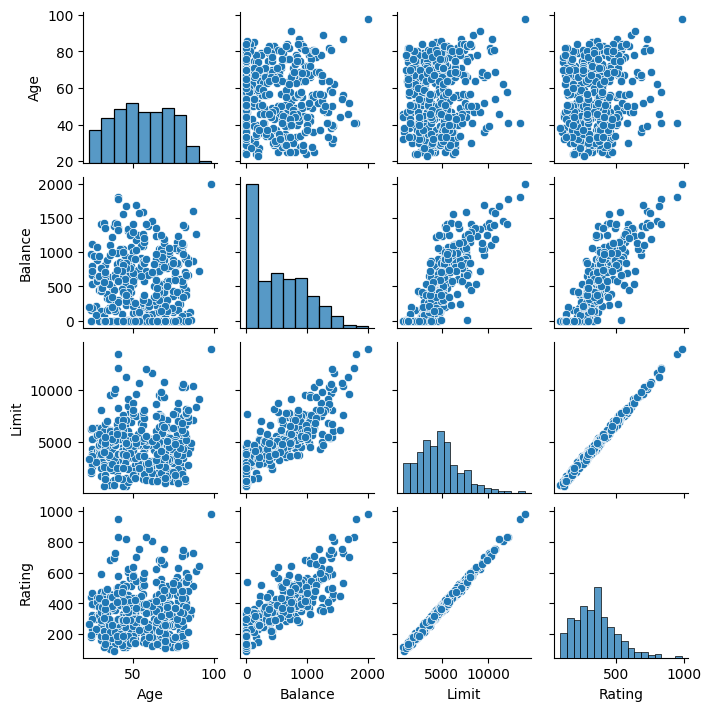

In [187]:
sns.pairplot(credit[['Age', 'Balance', 'Limit', 'Rating']], height=1.8);

Se ampliarmos a variável `Limit`, veremos que, por exemplo, ela não está muito correlacionada com `Age`, mas está muito correlacionada com `Rating`.

In [188]:
# Figure 3.14
def make_fig_3_14():
    
    # Init figure
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 
    fig.suptitle('Figure 3.14')

    # Left plot
    ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='brown')
    ax1.set_ylabel('Age')

    # Right plot
    ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='brown')
    ax2.set_ylabel('Rating')

    for ax in fig.axes:
        ax.set_xlabel('Limit')
        ax.set_xticks([2000,4000,6000,8000,12000])

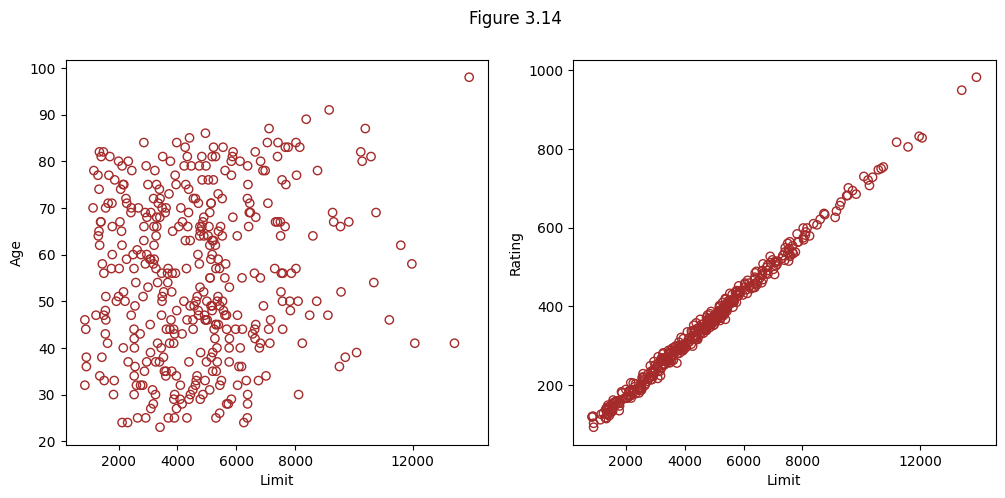

In [189]:
make_fig_3_14()

Se regredirmos `Balance` em `Limit` e `Age`, o coeficiente de `Limit` é positivo e altamente significativo.

In [190]:
# Regress balance on limit and age
reg1 = sm.OLS.from_formula('Balance ~ Limit + Age', credit).fit()
reg1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-164.7059,44.804,-3.676,0.000,-252.789,-76.623
Limit,0.1719,0.005,33.450,0.000,0.162,0.182
Age,-2.3705,0.687,-3.448,0.001,-3.722,-1.019


Entretanto, se regredirmos `Balance` em `Limit` e `Rating`, o coeficiente de `Limit` não será mais significativo.

In [191]:
# Regress balance on limit and rating
reg2 = sm.OLS.from_formula('Balance ~ Limit + Rating', credit).fit()
reg2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-382.0366,46.224,-8.265,0.000,-472.911,-291.162
Limit,0.0072,0.065,0.110,0.913,-0.121,0.135
Rating,2.4377,0.973,2.506,0.013,0.525,4.350


Observar a função objetivo, a Soma dos Quadrados Resíduos, ajuda a entender qual é o problema.

In [195]:
# First scale variables
y = credit.Balance
regr1 = LinearRegression().fit(scale(credit[['Age', 'Limit']].astype('float'), with_std=False), y)
regr2 = LinearRegression().fit(scale(credit[['Rating', 'Limit']], with_std=False), y)

# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

In [196]:
# Figure 3.15
def make_fig_3_15():

    # Init figure
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 
    fig.suptitle('Figure 3.15')

    # Minimum
    min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'

    # Left plot
    CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
    ax1.scatter(reg1.params[1], reg1.params[2], c='r', label=min_RSS)
    ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
    ax1.set_ylabel(r'$\beta_{Age}$')

    # Right plot
    CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
    ax2.scatter(reg2.params[1], reg2.params[2], c='r', label=min_RSS)
    ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
    ax2.set_ylabel(r'$\beta_{Rating}$')
    #ax2.set_xticks([-0.1, 0, 0.1, 0.2])

    for ax in fig.axes:
        ax.set_xlabel(r'$\beta_{Limit}$')
        ax.legend()

C:\Users\danie\AppData\Local\Temp\ipykernel_20636\693206380.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.scatter(reg1.params[1], reg1.params[2], c='r', label=min_RSS)
C:\Users\danie\AppData\Local\Temp\ipykernel_20636\693206380.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.scatter(reg2.params[1], reg2.params[2], c='r', label=min_RSS)


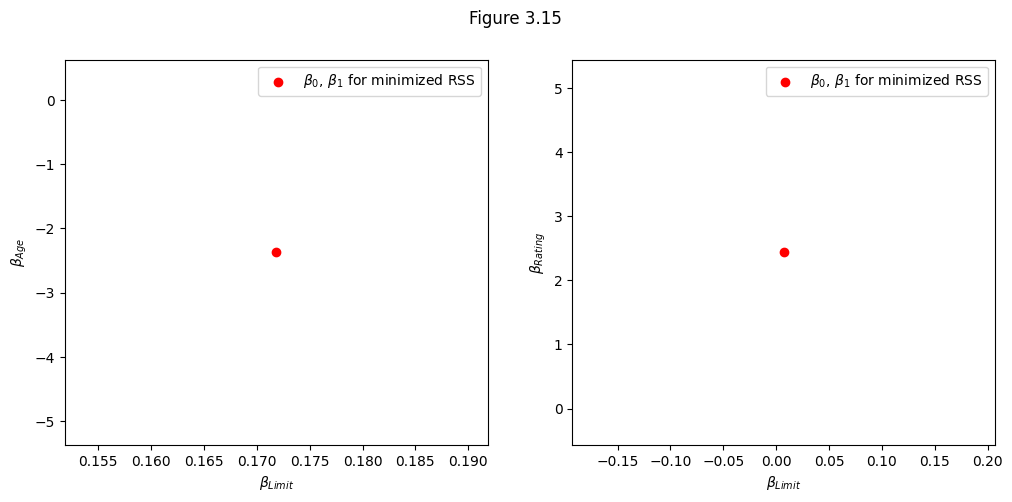

In [197]:
make_fig_3_15()

Como podemos ver, no gráfico da esquerda o mínimo está muito melhor definido do que no gráfico da direita.